# 4주차 실습문제: 조건에 따른 열 추가 & 데이터 시각화

***

In [154]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [99]:
data = pd.read_csv('health2018.csv')
data.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111


## 1. 정상 vs. 비만 간의 통계량 비교 및 시각화
### 1-1) state 열을 추가해서 BMI >= 25인 사람은 'Obese', BMI < 25인 사람은 'Normal'으로 기록하시오.

In [107]:
data['state'] = np.where(data.BMI >= 25, 'Obese', 'Normal')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese


### 1-2) 정상 vs. 비만인에서 혈당값(Blood_glucose)의 분포 차이를, boxplot과 violinplot로 그려 비교하시오.

<AxesSubplot:xlabel='state', ylabel='Blood_glucose'>

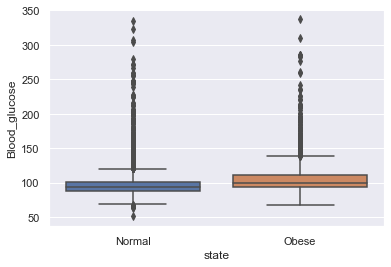

In [108]:
sns.boxplot(x = 'state', y = 'Blood_glucose', data = data)

<AxesSubplot:xlabel='state', ylabel='Blood_glucose'>

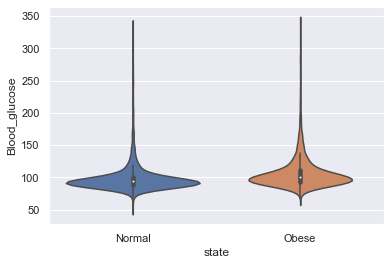

In [109]:
sns.violinplot(x = 'state', y = 'Blood_glucose', data = data)

### 1-3) Diabete 열을 추가해서 혈당값이 126 이상인 환자를 1로, 그렇지 않은 정상인을 0으로 기록하고, 정상 체중과 비만 체중 각각에서 당뇨병 환자의 비율을 구하시오.

In [124]:
data['Diabete'] = [ 1 if glucose >= 126 else 0 for glucose in data.Blood_glucose ]
data.groupby('state')['Diabete'].mean()

state
Normal    0.063366
Obese     0.130918
Name: Diabete, dtype: float64

***

## 2. 연령별 비만 유병율 시각화
### 2-1) 20대, 30대, 40대, 50대, 60대, 70대로 그룹을 나누고, 각 연령별 BMI의 분포를 violinplot으로 비교하시오.
x축 레이블로 20대, 30대, 40대, 50대, 60대, 70대가 명시되도록 할 것. (힌트: violinplot에 order=[...] 옵션으로 순서 지정)

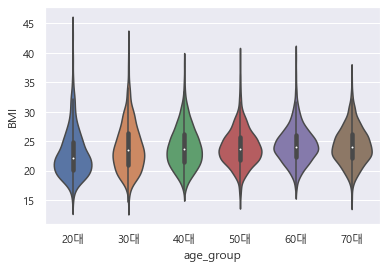

In [136]:
condition_list = [(data.age < 30), 
                  (data.age >= 30) & (data.age < 40), 
                  (data.age >= 40) & (data.age < 50), 
                  (data.age >= 50) & (data.age < 60), 
                  (data.age >= 60) & (data.age < 70), 
                  (data.age >= 70)]
choice_list = ['20대', '30대', '40대', '50대', '60대', '70대']
data['age_group'] = np.select(condition_list, choice_list, default = 'NaN')
data

sns.violinplot(x = 'age_group', y='BMI', data = data, order = choice_list)

### 2-2) 각 연령대별로 비만(BMI 25~30), 고도비만(BMI >= 30)인 사람의 비율을 구하시오.

In [141]:
data['비만'] = np.where((data.BMI >= 25) & (data.BMI < 30), 1, 0)
data['고도비만'] = np.where(data.BMI >= 30, 1, 0)
obs_ratio = data.groupby('age_group').비만.mean()
obs2_ratio = data.groupby('age_group').고도비만.mean()
print(obs_ratio)
print(obs2_ratio)

age_group
20대    0.175034
30대    0.276331
40대    0.301172
50대    0.300344
60대    0.336150
70대    0.333992
Name: 비만, dtype: float64
age_group
20대    0.067843
30대    0.078143
40대    0.056808
50대    0.035284
60대    0.044131
70대    0.047431
Name: 고도비만, dtype: float64


### 2-3) 연령대별 비만, 고도비만의 비율을 누적 막대그래프로 그리시오.
고도비만(BMI >= 30)을 아래쪽에 먼저 그리고, 비만(BMI: 25~30)을 그 위에 쌓는 꼴로 그리시오.

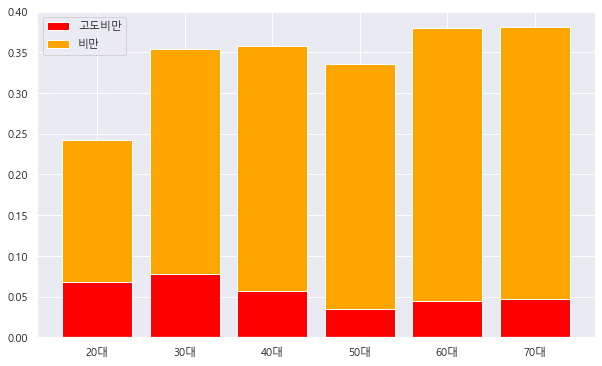

In [144]:
age_group = choice_list

# 그래프 크기 지정 
plt.figure(figsize = (10, 6))

# 그래프 출력
p1 = plt.bar(age_group, obs2_ratio, color = 'red')
p2 = plt.bar(age_group, obs_ratio, bottom = obs2_ratio, color='orange')

# 범례 표시 
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))

### 2-4) (보너스 문제) 남성/여성으로 나누어서 위 2-3) 그래프를 그리고 그 차이를 비교해보시오.

age_group
20대    0.240113
30대    0.408867
40대    0.415778
50대    0.393939
60대    0.363071
70대    0.293023
Name: 비만, dtype: float64 age_group
20대    0.107345
30대    0.100985
40대    0.074627
50대    0.022222
60대    0.026971
70대    0.032558
Name: 고도비만, dtype: float64


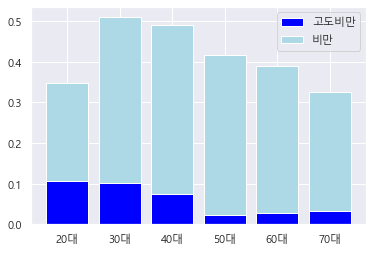

In [150]:
obs_ratio_male = data[data.sex == 'M'].groupby('age_group').비만.mean()
obs2_ratio_male = data[data.sex == 'M'].groupby('age_group').고도비만.mean()
print(obs_ratio_male, obs2_ratio_male)

p1 = plt.bar(age_group, obs2_ratio_male, color = 'blue')
p2 = plt.bar(age_group, obs_ratio_male, bottom = obs2_ratio_male, color='lightblue')
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))

age_group
20대    0.114883
30대    0.163522
40대    0.217188
50대    0.230885
60대    0.313894
70대    0.364261
Name: 비만, dtype: float64 age_group
20대    0.031332
30대    0.058700
40대    0.043750
50대    0.044978
60대    0.058319
70대    0.058419
Name: 고도비만, dtype: float64


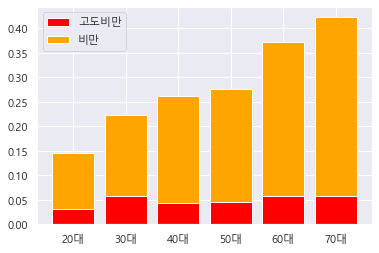

In [152]:
obs_ratio_female = data[data.sex == 'F'].groupby('age_group').비만.mean()
obs2_ratio_female = data[data.sex == 'F'].groupby('age_group').고도비만.mean()
print(obs_ratio_female, obs2_ratio_female)

p1 = plt.bar(age_group, obs2_ratio_female, color = 'red')
p2 = plt.bar(age_group, obs_ratio_female, bottom = obs2_ratio_female, color='orange')
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))